In [8]:
import pandas as pd

# Baca dataset
df = pd.read_csv('data/orders_dataset.csv')

# Tampilkan beberapa baris pertama
print(df.head())

# Informasi dataset
print(df.info())


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [9]:
# Konversi kolom menjadi tipe datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Cek apakah ada nilai NaN di kolom waktu
print(df.isnull().sum())


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


count    99281.000000
mean        10.419094
std         26.038004
min          0.000000
25%          0.215000
50%          0.343333
75%         14.580833
max       4509.180556
Name: approval_time_hours, dtype: float64


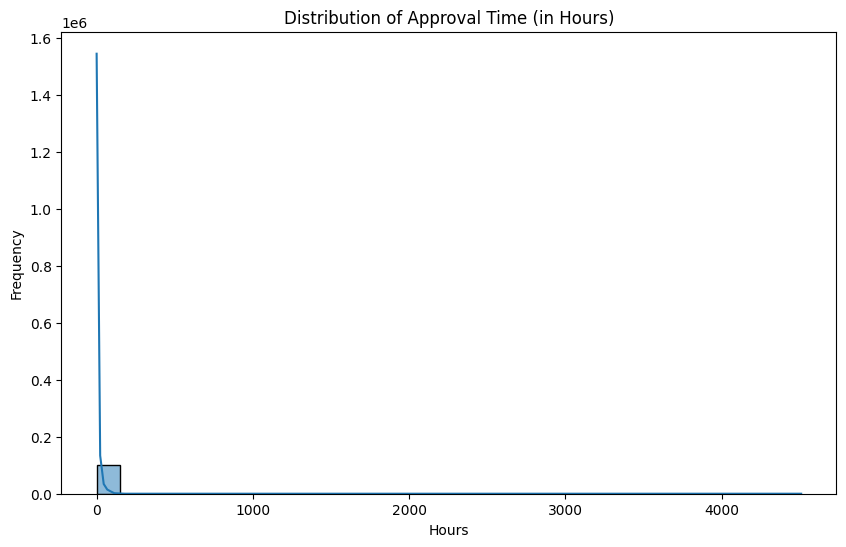

In [10]:
# Hitung selisih waktu dalam jam antara pembelian dan persetujuan
df['approval_time_hours'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600

# Distribusi waktu persetujuan
print(df['approval_time_hours'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi waktu persetujuan
plt.figure(figsize=(10, 6))
sns.histplot(df['approval_time_hours'].dropna(), bins=30, kde=True)
plt.title('Distribution of Approval Time (in Hours)')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()


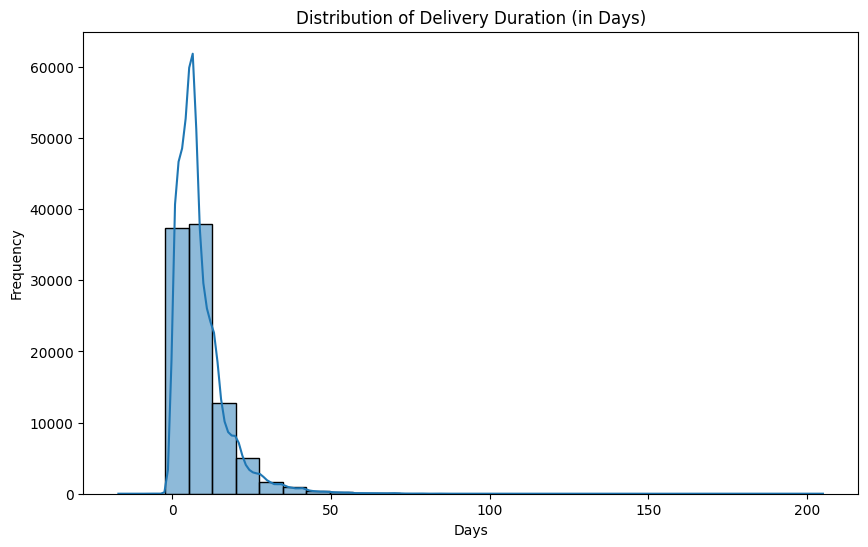

count    96476.000000
mean       -11.876881
std         10.183854
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delay_from_estimate, dtype: float64


In [11]:
# Hitung durasi pengiriman dalam hari
df['delivery_duration_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

# Hitung selisih dengan estimasi
df['delay_from_estimate'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Distribusi durasi pengiriman
plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_duration_days'].dropna(), bins=30, kde=True)
plt.title('Distribution of Delivery Duration (in Days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Cek apakah ada keterlambatan
print(df['delay_from_estimate'].describe())


/tmp/ipykernel_23381/2173505943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='order_status', data=df, palette='viridis')


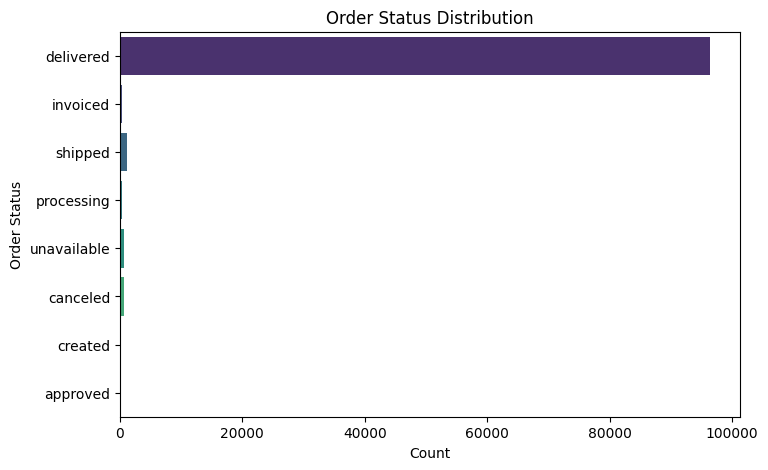

In [12]:
# Plot distribusi status order
plt.figure(figsize=(8, 5))
sns.countplot(y='order_status', data=df, palette='viridis')
plt.title('Order Status Distribution')
plt.xlabel('Count')
plt.ylabel('Order Status')
plt.show()
